In [182]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
API_KEY="GO143LK4E3VERLLK"

In [183]:
class ScriptData:
    #Initialize data frame to store various stock data
    def __init__(self):
        self.df_list={}
        pass
    
    #Fetches intraday for given script
    def fetch_intraday_data(self,script):
        ts = TimeSeries(key=API_KEY)
        df, meta_data = ts.get_intraday(symbol=script,interval='60min', outputsize='compact')
        self.df_list[script]=df
        return df
    
    #Converts fetched intraday data
    def convert_intraday_data(self,script):
        df=pd.DataFrame.from_dict(self.df_list[script], orient ='index') 
        df.reset_index(inplace=True)
        df = df.rename(columns = {'index':'timestamp'})
        df = df.rename(columns = {'1. open':'open'})
        df = df.rename(columns = {'2. high':'high'})
        df = df.rename(columns = {'3. low':'low'})
        df = df.rename(columns = {'4. close':'close'})
        df = df.rename(columns = {'5. volume':'volume'})
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['open'] = df['open'].astype(float)
        df['high'] = df['high'].astype(float)
        df['low'] = df['low'].astype(float)
        df['close'] = df['close'].astype(float)
        df['volume'] = df['volume'].astype(int)
        self.df_list[script]=df
        return df
    
    #To return script data
    def __getitem__(self,script):
        return self.df_list[script]
    
    #To check if script in object
    def __contains__(self, script):
        return script in self.df_list

    
    

In [184]:
script_data=ScriptData()
script_data.fetch_intraday_data('GOOGL')
script_data.convert_intraday_data('GOOGL')
script_data['GOOGL']

,timestamp,open,high,low,close,volume
0,2022-12-30 20:00:00,88.4600,88.5700,88.45,88.5500,6460
1,2022-12-30 19:00:00,88.3600,88.4500,88.35,88.4000,13286
2,2022-12-30 18:00:00,88.4815,88.4815,88.36,88.4199,7066
3,2022-12-30 17:00:00,88.2300,88.7400,88.22,88.5000,1038000
4,2022-12-30 16:00:00,87.2050,88.3000,87.20,88.2400,5183569
...,...,...,...,...,...,...
95,2022-12-22 05:00:00,89.8600,89.8600,89.70,89.7000,5285
96,2022-12-21 20:00:00,89.7000,89.7700,89.62,89.7700,8787
97,2022-12-21 19:00:00,89.7500,89.7900,89.60,89.7700,7033
98,2022-12-21 18:00:00,89.7100,89.7900,89.66,89.7500,4156


In [185]:
script_data.fetch_intraday_data('AAPL')
script_data.convert_intraday_data('AAPL')
script_data['AAPL']

,timestamp,open,high,low,close,volume
0,2022-12-30 20:00:00,129.9900,130.0400,129.9700,129.9700,40761
1,2022-12-30 19:00:00,129.9500,130.0500,129.9400,130.0100,35882
2,2022-12-30 18:00:00,130.0000,130.0500,129.9100,129.9487,76786
3,2022-12-30 17:00:00,129.9100,130.0500,129.7800,129.9900,2235326
4,2022-12-30 16:00:00,128.2800,129.9500,128.2550,129.9100,16425305
...,...,...,...,...,...,...
95,2022-12-22 05:00:00,135.7783,135.7783,135.2790,135.2790,21403
96,2022-12-21 20:00:00,135.4588,135.5586,135.3389,135.4987,40192
97,2022-12-21 19:00:00,135.4987,135.5287,135.3888,135.4588,42909
98,2022-12-21 18:00:00,135.4088,135.4887,135.3289,135.4887,43032


In [186]:
'GOOGL' in script_data

True

In [187]:
'AAPL' in script_data

True

In [188]:
'NVDA' in script_data

False

In [189]:
def indicator1(df, timeperiod):
    size= len(df.index)
    indicator = [numpy.nan for x in range(timeperiod-1)]
    i = timeperiod
    while i<= size:
        indicator.append((df.iloc[i-timeperiod:i,[4]].sum()/timeperiod)[0])
        i=i+1
    df['indicator1']=indicator
    df = df[['timestamp','indicator1']]
    return df

In [190]:
indicator1(script_data['GOOGL'], 5)

,timestamp,indicator1
0,2022-12-30 20:00:00,NaN
1,2022-12-30 19:00:00,NaN
2,2022-12-30 18:00:00,NaN
3,2022-12-30 17:00:00,NaN
4,2022-12-30 16:00:00,88.42198
...,...,...
95,2022-12-22 05:00:00,89.33002
96,2022-12-21 20:00:00,89.59800
97,2022-12-21 19:00:00,89.68200
98,2022-12-21 18:00:00,89.72800


In [191]:
indicator1(script_data['AAPL'], 5)

,timestamp,indicator1
0,2022-12-30 20:00:00,NaN
1,2022-12-30 19:00:00,NaN
2,2022-12-30 18:00:00,NaN
3,2022-12-30 17:00:00,NaN
4,2022-12-30 16:00:00,129.96574
...,...,...
95,2022-12-22 05:00:00,134.79352
96,2022-12-21 20:00:00,135.15314
97,2022-12-21 19:00:00,135.29298
98,2022-12-21 18:00:00,135.38286


In [192]:
class Strategy:
    
    #Initialize all variables of Strategy class
    def __init__(self, script):
        self.timestamp=[]
        self.close_data=[]
        self.indicator_data=[]
        self.df=pd.DataFrame()
        self.script_data=ScriptData()
        self.script=script
        pass
    
    #Get script data by calling convert_intraday_data and indicator1 functions
    def get_script_data(self):
        temp_data=self.script_data.fetch_intraday_data(self.script)
        temp_data=self.script_data.convert_intraday_data(self.script)
        self.timestamp=temp_data['timestamp']
        self.close_data=temp_data['close']
        self.indicator_data=indicator1(self.script_data[self.script], 5)['indicator1']
        self.df['timestamp']=self.timestamp
        self.df['close']=self.close_data
        self.df['indicator1']=self.indicator_data
        return
    
    # Provide signals based on close and indicator data
    def get_signals(self):
        size= len(self.df.index)
        signal = ["NaN"]
        i = 1
        while i< size:
            #Indicator cuts close downwards
            if(self.close_data[i]>=self.indicator_data[i] and self.close_data[i-1]<=self.indicator_data[i-1]):
                signal.append("BUY")
            #Indicator cuts close upwards
            elif(self.close_data[i]<=self.indicator_data[i] and self.close_data[i-1]>=self.indicator_data[i-1]):
                signal.append("SELL")
            else:
                signal.append("NO SIGNAL")                                
            i=i+1
        self.df['signal']=signal
        return self.df[['timestamp','signal']]
    
    #Visualize close and indicator cutting each other
    def plotting(self, lower, upper):
        ax = plt.gca() 
        # line plot for close data
        strategy.df.iloc[lower:upper].plot(kind = 'line', x = 'timestamp', y = 'close', color = 'red',ax = ax)
        # line plot for indicator data
        strategy.df.iloc[lower:upper].plot(kind = 'line',x = 'timestamp', y = 'indicator1', color = 'blue',ax = ax)
        # set the title
        plt.title('Buy / Sell')
        # show the plot
        plt.show()
        

In [193]:
strategy= Strategy('NVDA')
strategy.get_script_data()
strategy.indicator_data

0          NaN
1          NaN
2          NaN
3          NaN
4     146.2945
        ...   
95    163.3020
96    163.9440
97    164.4220
98    164.6460
99    164.7960
Name: indicator1, Length: 100, dtype: float64

In [198]:
df=strategy.get_signals()

In [195]:
# Filters all records with BUY or SELL
df.loc[(df['signal'] == 'BUY')|(df['signal'] == 'SELL')]

,timestamp,signal
13,2022-12-30 07:00:00,BUY
20,2022-12-29 16:00:00,SELL
23,2022-12-29 13:00:00,BUY
25,2022-12-29 11:00:00,SELL
37,2022-12-28 15:00:00,BUY
40,2022-12-28 12:00:00,SELL
42,2022-12-28 10:00:00,BUY
43,2022-12-28 09:00:00,SELL
44,2022-12-28 08:00:00,BUY
47,2022-12-28 05:00:00,SELL


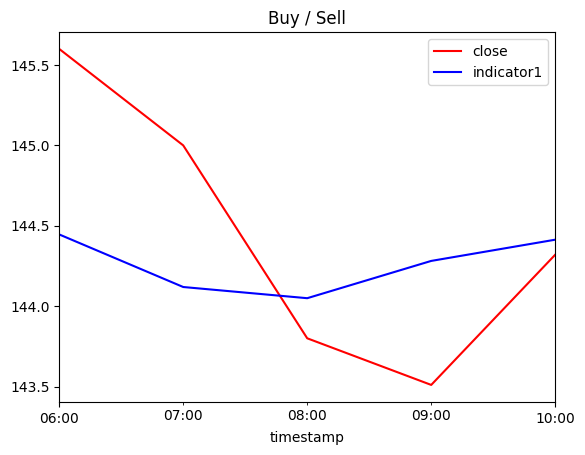

In [196]:
# We can see that the 13th record indicator cuts close from above, hence we buy 
strategy.plotting(10,15)

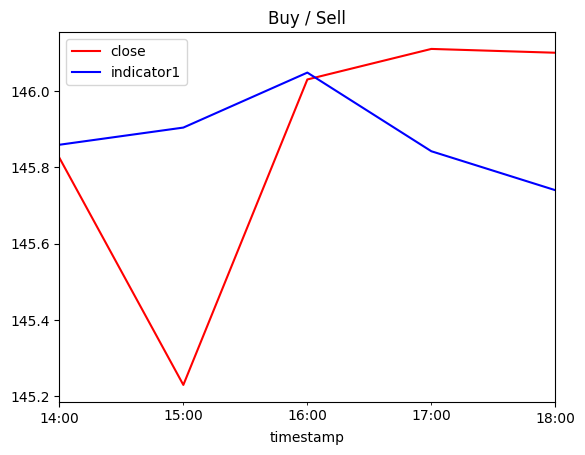

In [197]:
# We can see that the 20th record indicator cuts close from bellow, hence we sell
strategy.plotting(18,23)